# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 1

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

## Learning the logic operators

### Task 1

- Run the above code and interpret the results. Please note the output of the model is the prediction of class labels of each of the four points. If you run the code several times, will you observe the same results? Why?

**Answer**: No, we will not get the same results if we run the code several times. This is because the weights and biases are randomized at the start, introducing a source of randomness that also affects the results. 

In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt


sigmoid function : σ(x) = 1 / (1 + e^(-x))

*  σ(x) is the output of the sigmoid function.
*  x is the input value.
*  e is the base of the natural logarithm (approximately equal to 2.71828).

In [2]:
# Sigmoid function (activation function)
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

In [3]:
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

- Keep the parameter “n_unit=1” and increase the number of iterations starting from 10, 50, 100, 500, 2000, and compare the loss values. What can you conclude from increasing the number of iterations?

weights2 [[0.37009841]]

Iteration Value: 10
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.34245052]
 [0.32823003]
 [0.31830738]
 [0.30629271]]
weights2 [[0.05120687]]

Iteration Value: 50
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.26367315]
 [0.25287224]
 [0.25339026]
 [0.24645765]]
weights2 [[0.52647582]]

Iteration Value: 100
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.07609012]
 [0.20906672]
 [0.20517965]
 [0.4233257 ]]
weights2 [[0.82101992]]

Iteration Value: 500
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.001872  ]
 [0.04399503]
 [0.04399504]
 [0.49143807]]
weights2 [[0.67039137]]

Iteration Value: 2000
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.73409658e-04]
 [1.84607505e-02]
 [1.84607505e-02]
 [4.98103994e-01]]


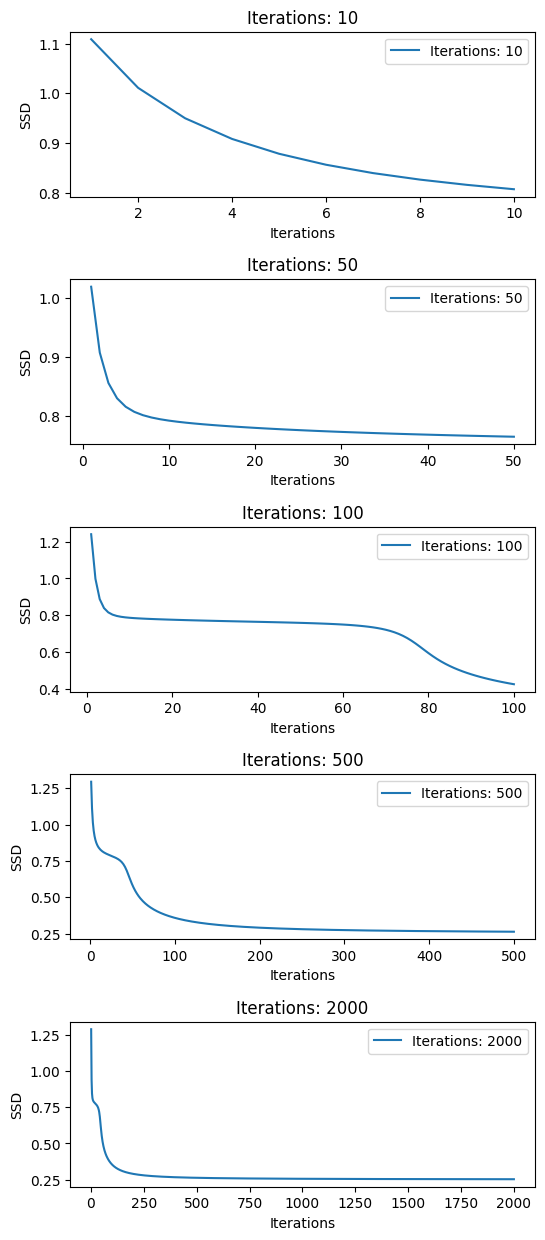

In [13]:
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        print('weights2',self.weights2 )
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
        elf.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    
iterations_values = [10,50,100,500,2000]
n_unit = 1
# Create a grid of subplots
fig, axs = plt.subplots(len(iterations_values), 1, figsize=(6, 15))

if __name__ == "__main__":
    for i,iterations in enumerate(iterations_values):
        Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) #  x inputs are given, x1,x2
        Target = np.array([[0],[0],[0],[1]])
        model = NeuralNetwork(Input, Target, n_unit)
        SSD = []
        for j in range(iterations):
            model.feedforward()
            model.backprop()
            errors = (Target - model.output)**2
            SSD.append(np.sum(errors)) # Objective(loss) function
        
        print("\nIteration Value: {}".format(iterations))
        print("The target values are:", Target)
        print("The predicted values are:", model.output)
    
        Itr = np.linspace(1,len(SSD),len(SSD))
        axs[i].plot(Itr, SSD, label=f"Iterations: {iterations}")
        axs[i].set_xlabel('Iterations')
        axs[i].set_ylabel('SSD')
        axs[i].set_title(f"Iterations: {iterations}")
        axs[i].legend()
    plt.subplots_adjust(hspace=0.5)
    plt.show()




**Answer**: The loss value gets lower as the number of iterations increases. With more iterations, the neural network gets more and more trained to the problem and performs it better. After 500 iterations, the improvement in the loss gets smaller, and at some point, the increase in the iterations does not improve the loss anymore.

- Now, with a fixed value of “iterations = 1000”, increase the parameter “n_unit” to 2, 5, 10 and interpret the results.


n_unit Value: 2
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[3.11481446e-04]
 [3.00595606e-02]
 [3.05050633e-02]
 [4.94911371e-01]]

n_unit Value: 5
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[1.57388505e-04]
 [1.53817772e-02]
 [1.49669014e-02]
 [9.77638672e-01]]

n_unit Value: 10
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[1.93078342e-04]
 [1.57761859e-02]
 [1.62410604e-02]
 [9.78069353e-01]]


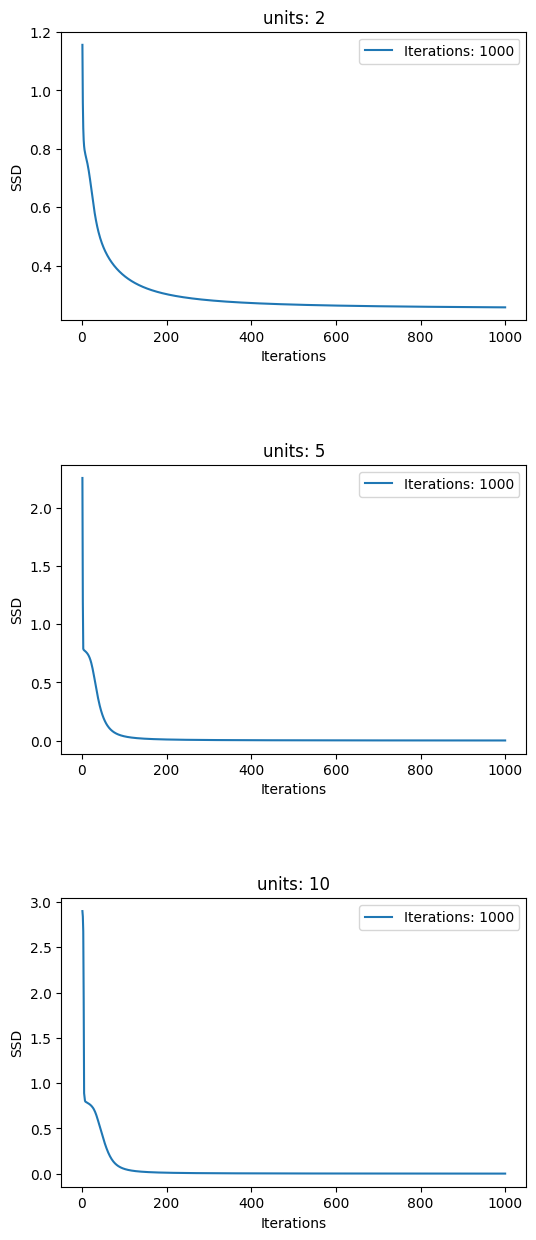

In [14]:
#fixed iteration of 1000
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
iterations = 1000
n_unit_values = [2, 5, 10]
# Create a grid of subplots
fig, axs = plt.subplots(len(n_unit_values), 1, figsize=(6, 15))

if __name__ == "__main__":
    for i,n_unit in enumerate(n_unit_values):
        Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # x inputs are given, x1,x2
        Target = np.array([[0],[0],[0],[1]])
        model = NeuralNetwork(Input, Target, n_unit)
        SSD = []
        for j in range(iterations):
            model.feedforward()
            model.backprop()
            errors = (Target - model.output)**2
            SSD.append(np.sum(errors)) # Objective(loss) function
        Itr = np.linspace(1,len(SSD),len(SSD))
        axs[i].plot(Itr, SSD, label=f"Iterations: {iterations}")
        axs[i].set_xlabel('Iterations')
        axs[i].set_ylabel('SSD')
        axs[i].set_title(f"units: {n_unit}")
        axs[i].legend()
        
        print("\nn_unit Value: {}".format(n_unit))
        print("The target values are:", Target)
        print("The predicted values are:", model.output)
    plt.subplots_adjust(hspace=0.5)
    plt.show()


**Answer**: Increasing the n_unit increases the number of neurons in the hidden layer. The results show that the increase in the number of neurons help neural network to achieve higher accuracy in the predicted values. On the other hand, the initial loss increases with as we increase the number of neurons in the neural network considering the model starts with higher number of weights which would lead higher loss in the beginning.

### Task 2

- Repeat task1 for XOR logic operator. For fixed values of parameters (iterations=2000, and n_unit=1), which of the AND or XOR operators has lower loss values? Why? 

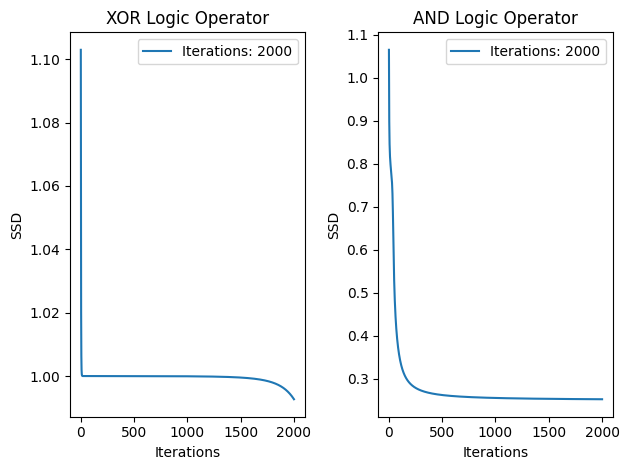

The target values of XOR  are: [[0]
 [1]
 [1]
 [0]]
The predicted values of XOR are: [[0.52426981]
 [0.54446869]
 [0.54502083]
 [0.55072032]]
The target values of AND operator are: [[0]
 [0]
 [0]
 [1]]
The predicted values of AND operator are: [[4.61829389e-04]
 [1.84383731e-02]
 [1.84383731e-02]
 [4.98102440e-01]]


In [15]:
#fixed iteration of 1000
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
iterations = 2000
n_unit = 1

if __name__ == "__main__":

#XOR logic operator
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # 2 x inputs are given, x1,x2
    Target = np.array([[0],[1],[1],[0]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for j in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function
    Itr = np.linspace(1,len(SSD),len(SSD))

#And operator
    Input_And = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # 2 x inputs are given, x1,x2
    Target_And = np.array([[0],[0],[0],[1]])
    model_And = NeuralNetwork(Input_And, Target_And, n_unit)
    SSD_And = []
    for j in range(iterations):
        model_And.feedforward()
        model_And.backprop()
        errors_And = (Target_And - model_And.output)**2
        SSD_And.append(np.sum(errors_And)) # Objective(loss) function
    Itr_And = np.linspace(1,len(SSD_And),len(SSD_And))

plt.subplot(1, 2, 1)
plt.plot(Itr, SSD, label=f"Iterations: {iterations}")
plt.xlabel('Iterations')
plt.ylabel('SSD')
plt.title("XOR Logic Operator")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Itr_And, SSD_And, label=f"Iterations: {iterations}")
plt.xlabel('Iterations')
plt.ylabel('SSD')
plt.title("AND Logic Operator")
plt.legend()

plt.tight_layout()
plt.show()

print("The target values of XOR  are:", Target)
print("The predicted values of XOR are:", model.output)

print("The target values of AND operator are:", Target_And)
print("The predicted values of AND operator are:", model_And.output)


**Answer**:

XOR operator return 1 if the number of 1 inputs is odd, returns 0 if number of 1 inputs is even

AND operator returns 1 if both the inputs are  1 else 0

Based on the predicted values above we see XOR operator predicted [[0.52426981]
 [0.54446869]
 [0.54502083]
 [0.55072032]] we see that all the inputs have same predicted values close to 0.5 which indicates that the XOR model has not effectively learned with the given training parameters and the loss is relatively high.

 Where as in AND operator predicted values are [[4.61829389e-04]
 [1.84383731e-02]
 [1.84383731e-02]
 [4.98102440e-01]] the predicted values are closer to the target values. This shows that the neural network has learned the AND function more effectively. The loss values are relatively low.

 The loss values of AND operator are closer to 0 than XOR loss values. This showes that AND operator model has learned more effectively.
 
We think it is because it is impossible to draw a straight line in the 2D illustration of the logic (fig 3 in the lab instructions) that places (0,1) and (1,0) on one side of the line and (0,0) and (1,1) on the other side.

- Increase the number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50. Does increasing the number of neurons improve the results? Why?


n_unit Value: 2
The target values of XOR  are: [[0]
 [1]
 [1]
 [0]]
The predicted values of XOR are: [[0.05489895]
 [0.95986863]
 [0.95986866]
 [0.05042235]]
The target values of AND operator are: [[0]
 [0]
 [0]
 [1]]
The predicted values of AND operator are: [[0.00173169]
 [0.01243855]
 [0.01361556]
 [0.97783494]]

n_unit Value: 5
The target values of XOR  are: [[0]
 [1]
 [1]
 [0]]
The predicted values of XOR are: [[0.01088032]
 [0.98143382]
 [0.98297077]
 [0.0193755 ]]
The target values of AND operator are: [[0]
 [0]
 [0]
 [1]]
The predicted values of AND operator are: [[9.99988224e-05]
 [1.03801705e-02]
 [1.00562044e-02]
 [9.84831563e-01]]

n_unit Value: 10
The target values of XOR  are: [[0]
 [1]
 [1]
 [0]]
The predicted values of XOR are: [[0.01182816]
 [0.98291314]
 [0.98127233]
 [0.02106431]]
The target values of AND operator are: [[0]
 [0]
 [0]
 [1]]
The predicted values of AND operator are: [[9.83112398e-06]
 [9.32658075e-03]
 [9.54078845e-03]
 [9.86651590e-01]]

n_unit Value

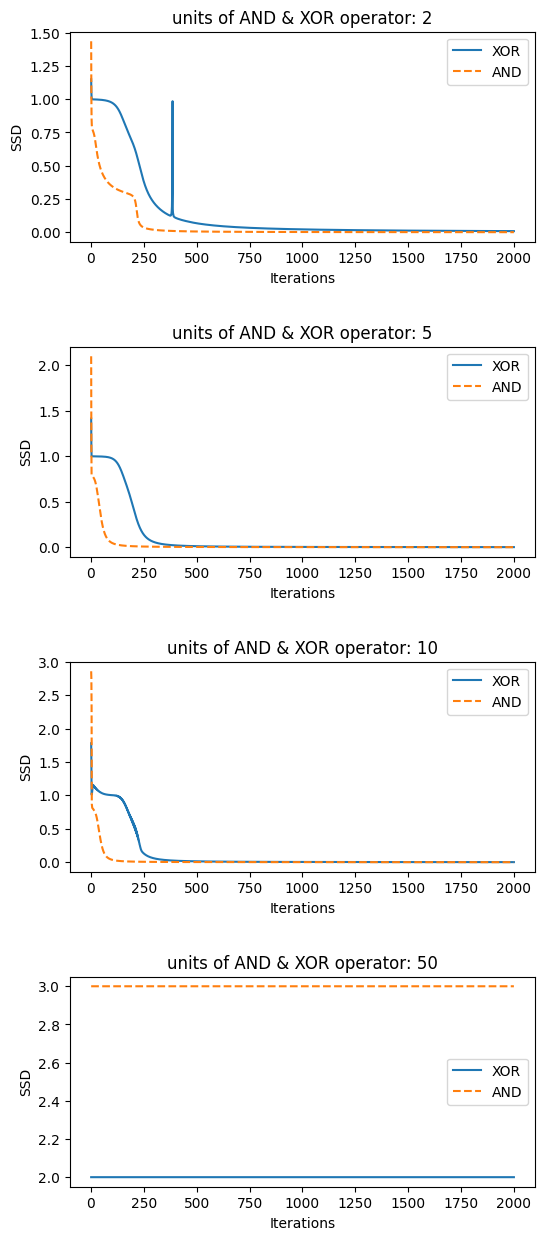

In [19]:
#Increase the number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50.

#fixed iteration of 1000
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
        self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
iterations = 2000
n_unit_values = [2,5,10,50]
# Create a grid of subplots
fig, axs = plt.subplots(len(n_unit_values), 1, figsize=(6, 15))

if __name__ == "__main__":
    for i,n_unit in enumerate(n_unit_values):

        #XOR logic operator
        Input = np.array([[0,0,1],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1]]) # 2 x inputs are given, x1,x2
        Target = np.array([[0],[1],[1],[0]])
        model = NeuralNetwork(Input, Target, n_unit)
        SSD = []
        for j in range(iterations):
            model.feedforward()
            model.backprop()
            errors = (Target - model.output)**2
            SSD.append(np.sum(errors)) # Objective(loss) function
        Itr = np.linspace(1,len(SSD),len(SSD))

        #And operator
        Input_And = np.array([[0,0,1],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1]]) # 2 x inputs are given, x1,x2
        Target_And = np.array([[0],[0],[0],[1]])
        model_And = NeuralNetwork(Input_And, Target_And, n_unit)
        SSD_And = []
        for j in range(iterations):
            model_And.feedforward()
            model_And.backprop()
            errors_And = (Target_And - model_And.output)**2
            SSD_And.append(np.sum(errors_And)) # Objective(loss) function
        Itr_And = np.linspace(1,len(SSD_And),len(SSD_And))


        axs[i].plot(Itr, SSD, label=f"XOR")
        axs[i].plot(Itr_And, SSD_And, linestyle='--', label=f"AND")
        axs[i].set_xlabel('Iterations')
        axs[i].set_ylabel('SSD')
        axs[i].set_title(f"units of AND & XOR operator: {n_unit}")
        axs[i].legend()
        
        print("\nn_unit Value: {}".format(n_unit))
        print("The target values of XOR  are:", Target)
        print("The predicted values of XOR are:", model.output)
        print("The target values of AND operator are:", Target_And)
        print("The predicted values of AND operator are:", model_And.output)

        
    plt.subplots_adjust(hspace=0.5)
    plt.show()


**Answer**:
The AND operator is simple and can learn effectively for single hidden layers.In this scenario as the number of units were increased, the AND operator improved only slightly as predicted values of targe value 0 got closer to 0 and predicted values of target value 1 got closer to 1.

XOR is more complex function and hence increasing the number of units increased the performance for XOR more than it did for ANd operator, but after few iterations the neural network is overfitting the data, that is it is adding noise in the data.

For 50 units, neural network cannot learn  neither from XOR nor from AND as the loss plot shows that there is no decrease in the loss throughout iterations.

Adding the learning parameter

In [21]:
#using tensorflow

#Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 1

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
                optimizer = SGD(learning_rate = 0.01),
                metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 2000, verbose=0)

print("The predicted class labels are:", model.predict(Input))


1/1 [==============================] - 0s 50ms/step
The predicted class labels are: [[0.5]
 [0.5]
 [0.5]
 [0.5]]


### Task 3

- In the above code, change the parameter “n_unit” as 1, 10 and interpret the observed results.

In [23]:
#change the parameter “n_unit” as 1, 10
#using tensorflow

#Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
            optimizer = SGD(learning_rate = 0.01),
            metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 2000, verbose=0)

print("The predicted class labels are:", model.predict(Input))


1/1 [==============================] - 0s 51ms/step
The predicted class labels are: [[0.46124938]
 [0.61363447]
 [0.5054442 ]
 [0.44785944]]


**Answer**:The model using Tensorflow and n_unit=1 gives inaccurate results as all four predictions are around 0.5, which is close to the chance level. Using n_unit=10 gives a better result with a more successful separation with the middle two predictions around 0.6 (ideally 1) and the others around 0.4 (ideally 0). It is still not close to correct but it is better than the chance level of 0.5.

## Multilayer Perceptron for Image Classification

- Review the following data loader code and find out how it works. Run it to load the training and test data.

In [31]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [32]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
    The image file name.
    pat1 : Str
    A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
    A string pattern in the filename 2nd class, e.g, "Nev"
    Returns
    -------
    Label : Numpy array
    Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label

**Answer**: In the above function **gen_labels** , we see that based on the string pattern contained in the filename, the label is assigned. For filenames wit "Mel", a label 0 is assigned and for filenames with "Nev", a label 1 is assigned.

In [33]:
def get_data(data_path, data_list, img_h, img_w):
    """

    Parameters
    ----------
    train_data_path : Str
    Path to the data directory
    train_list : List
    A list containing the name of the images.
    img_h : Int
    image height to be resized to.
    img_w : Int
    image width to be resized to.
    Returns
    -------
    img_labels : Nested List
    A nested list containing the loaded images along with their
    correcponding labels.
    """
    img_labels = []

    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))

    shuffle(img_labels)

    return img_labels

**Answer**: In the above function **get_data** , we see that it reads image files as gray format with provided image height and image width values. Then the read image is assigned with its label. In the end, all the image-label data are shuffled before returning.

In [34]:
def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
    nested list of image arrays with corresponding class labels.
    img_h : Int
    Image height.
    img_w : Int
    Image width.
    Returns
    -------
    img_arrays : Numpy array
    4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
    1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays

**Answer**: In the above function **get_data_arrays** , we see that it gets the nested list prepared by **get_data** function and returns the image arrays and their corresponding labels in arrays separately.

In [35]:
def get_train_test_arrays(train_data_path, test_data_path, train_list,
test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    
    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label

**Answer**: In the above function **get_train_test_arrays** , we see that it gets the training and test data from their corresponding file paths and then, the image data and its corresponding label are extracted for both training and test data.

### Task 4

- Develop a 4-layers MLP. If you call the number of neurons in the first fully-connected layer as “base_dense”, this 4-layers MLP should contain “base_dense”, “base_dense//2”, and “base_dense//4” as the number of neurons in the first 3 layers respectively. The activation function of all those neurons should set as “Relu”. However, in the last layer (4th layer), choose a proper number of neurons as well as activation function(s) that fit the binary classification task. Develop your model as a function, and remember to, first, import all the required layers/tools from tensorflow.

- Then compile the model by setting ‘binary cross entropy’ as loss function and ‘binary accuracy’ as evaluation metric and train the model for the following parameters: n_epochs = 50, Batch_Size = 16, base_dense = 64, LR = 0.0001 by using “clf_hist = clf.fit(...)”

In [36]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
#data_path = 'Data//DL_course//Lab1//Skin//' # Path to data root with two subdirs.
data_path = 'Data/DL_course/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

x_train, x_test, y_train, y_test = get_train_test_arrays(
    train_data_path, test_data_path,
    train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [37]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

def model(img_width, img_height, img_ch, base_dense):
    """
    Functional API model.
    name the last layer as "out"; e.g., out = ....
    """
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    
    x = Flatten()(inputs_layer)
    x = Dense(base_dense, activation="relu")(x)
    x = Dense(base_dense/2, activation="relu")(x)
    x = Dense(base_dense/4, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    clf = Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    
    return clf



In [59]:
def model_trainer(learning_rate, epochs, base_dense):
    clf = model(img_w, img_h, 1, base_dense)

    clf.compile(loss='BinaryCrossentropy', optimizer = SGD(learning_rate = learning_rate), metrics=['binary_accuracy']) 

    clf_hist = clf.fit(x_train, y_train, epochs = epochs, batch_size=16, verbose=0, validation_data=(x_test, y_test))

    return clf_hist

- The values of loss and accuracy metrics are saved within the variable “clf_hist”. You can use the following code to visualize the loss curves:

In [66]:
def loss_accuracy_plot(clf_hist, string):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    #Plot for loss values
    axs[0].set_title("Learning curve")
    axs[0].plot(clf_hist.history["loss"], label="loss")
    axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
    axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                np.min(clf_hist.history["val_loss"]),
                marker="x", color="r", label="best model")

    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss Value")
    axs[0].legend()
    
    fig.suptitle(string, fontsize=16)
    
    #Plot for accuracy values
    axs[1].set_title("Learning curve")
    axs[1].plot(clf_hist.history["binary_accuracy"], label="accuracy")
    axs[1].plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    axs[1].plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
                np.max(clf_hist.history["val_binary_accuracy"]),
                marker="x", color="r", label="best model")

    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 dense_36 (Dense)            (None, 64)                1048640   
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,051,265
Trainable params: 1,051,265
Non-tra

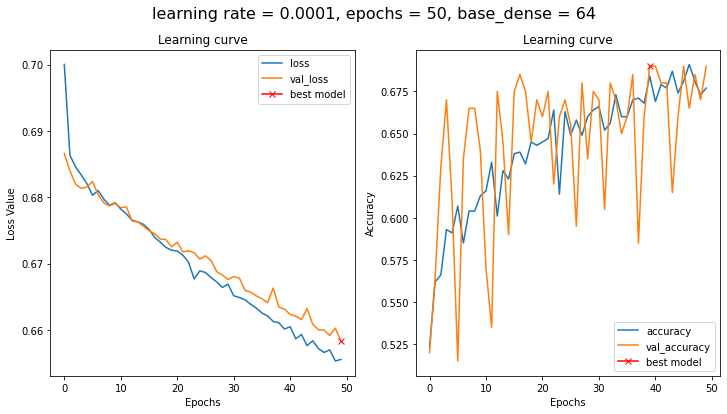

In [67]:
learning_rate = 0.0001
epochs = 50
base_dense = 64

clf_hist = model_trainer(learning_rate, epochs, base_dense)
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, base_dense = {}". format(learning_rate,epochs,base_dense))

- How do you interpret the observed values of loss and accuracy values? Is the number of epochs enough to make a good decision about model performance?

**Answer**: When we check the validation loss, we see that it continues to decreasing. This might mean that we can further decrease the loss if we use more epochs. If we check the accuracy values, we see that the maximum validation accuracy is achieved around 40 epochs. Considering the accuracy continues to fluctuate, the accuracy might also improve in upcoming epochs. Hence, the current number of epoch may not be enough to consider the current model as the best model.

- For the same number of epochs, reduce the learning rate parameter to 0.1 and interpret the results.

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_40 (Dense)            (None, 64)                1048640   
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,051,265
Trainable params: 1,051,265
Non-tra

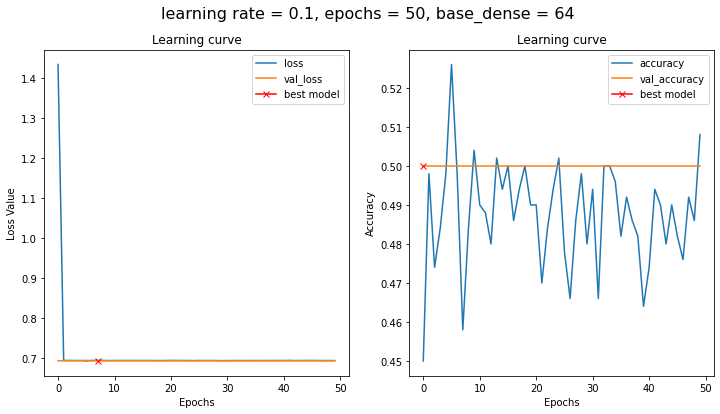

In [68]:
learning_rate = 0.1
epochs = 50
base_dense = 64

clf_hist = model_trainer(learning_rate, epochs, base_dense)
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, base_dense = {}". format(learning_rate,epochs,base_dense))

**Answer**: After increasing learning rate to 0.1, we see that the model is not able to learn anything and neither validation loss nor validation accuracy improves in that case.

- Now increase the number of epochs to 150 with LR=0.0001. Does this model have enough capacity to yield acceptable results?

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_44 (Dense)            (None, 64)                1048640   
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,051,265
Trainable params: 1,051,265
Non-tra

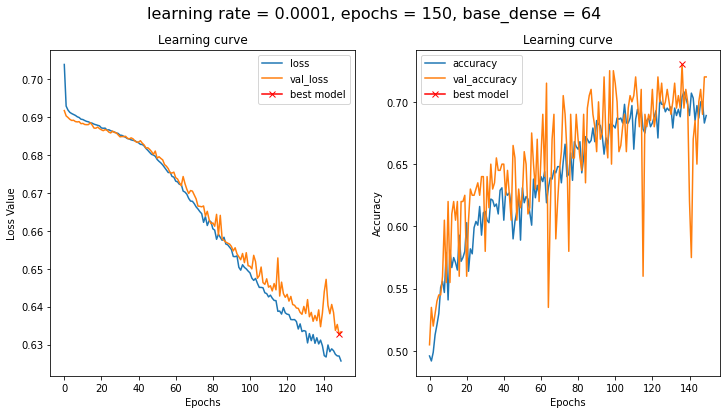

In [69]:
learning_rate = 0.0001
epochs = 150
base_dense = 64

clf_hist = model_trainer(learning_rate, epochs, base_dense)
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, base_dense = {}". format(learning_rate,epochs,base_dense))

**Answer**: As we mentioned in the previous answer, increasing number of epochs helped us to improve loss value and accuracy in this model. Compared to scenario with epochs = 50, we have lower validation loss value and higher validation accuracy value above 0.70. Hence, this model yields to more acceptable results.

- Increase the “base_dense” parameter to 256 and compare the results with the case of “base_dense=64”. Is increasing the model capacity helpful to improve the model performance? Why?

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 flatten_10 (Flatten)        (None, 16384)             0         
                                                                 
 dense_48 (Dense)            (None, 256)               4194560   
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,235,777
Trainable params: 4,235,777
Non-tr

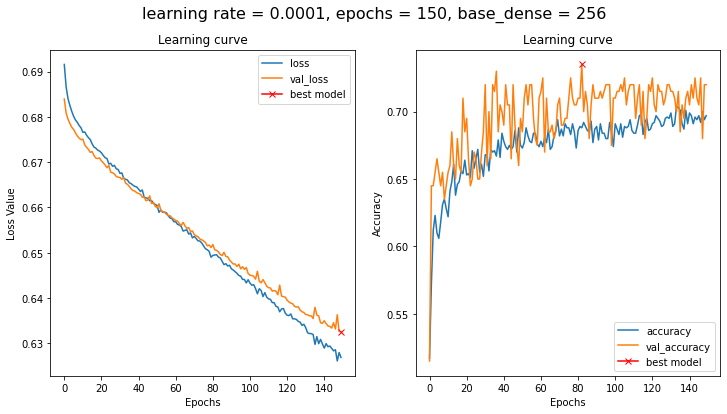

In [70]:
learning_rate = 0.0001
epochs = 150
base_dense = 256

clf_hist = model_trainer(learning_rate, epochs, base_dense)
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, base_dense = {}". format(learning_rate,epochs,base_dense))

**Answer**: The results show that, compared to base_dense = 64 scenario, having base_dense = 256 made the learning process more stable as there is less fluctucation in both loss plot and accuracy plot. The accuracy plot shows that validation accuracy is frequently getting higher values compared to base_dense = 64. Also, it should be noted that base_dense = 256 achieved the highes validation accuracy around 80 epochs while base_dense = 64 achieved it around 135 epochs.

Therefore, we can state that increasing base_dense value made model more stabilized and reliable in terms of performance.